In [1]:
# path configurations
INPUT_PATHS = ['/kaggle/input/mental-health-support-feature-analysis/', '/kaggle/input/suicide-watch-reddit/']
OCD_PATH = '/kaggle/input/ocd-reddit/ocd.csv'
ASPERGERS_PATH = '/kaggle/input/aspergers-dataset/aspergers.csv'
OUTPUT_PATH = '/kaggle/working/final_cut.csv'
PREPARED_PATH = '/kaggle/input/mental-disorder-dataset-analysis/processed_mental_disorders.csv'

In [2]:
# retained dataframe fields
SAVED_FIELDS = ['subreddit', 'post']
MENTAL_DISORDER_LABELS = ['adhd', 'bipolar', 'autism', 'schizophrenia', 'anxiety', 'lonely',
       'depression', 'mentalhealth', 'eating-disorder', 'jokes', 'ptsd',
       'suicidewatch', 'OCD']
NEUTRAL_MENTAL_DISORDER = 'no-mental-disorder'
MISSING_SENTIMENT_PLACEHOLDER = -1 ## value used to flag, blocking the training when facing this label

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pprint import pprint
from tqdm import tqdm
from typing import Dict, List
from IPython.display import display
import seaborn as sns

In [4]:
# utility to list directories form differnet files
def listdirs(basedirs: str):
  return [os.path.join(basedir, dir) for basedir in basedirs for dir in os.listdir(basedir) if dir.endswith('.csv')]

# Loading and processing the mental disorder classification datasets

In [5]:
from typing import List

def merge_csv(basedirs: List[str]):

  dirs = listdirs(basedirs)
  outputs: List[pd.DataFrame] = []

  for dir in tqdm(dirs):
    if not any( 
               [ label in dir for label in ['guns', 'relationships', 'divorce', 'alcoholism', 'COVID19', 'legaladvice']
               ]):
    
        df = pd.read_csv(dir, index_col=False)
        outputs.append(df)

  return pd.concat(outputs, ignore_index=True)
 
full_df = merge_csv(INPUT_PATHS)

100%|██████████| 102/102 [00:53<00:00,  1.91it/s]


In [6]:
full_df.to_csv('/kaggle/working/merged.csv')

In [7]:
# full_df = pd.read_csv('/kaggle/input/mental-disorder-dataset-analysis/merged.csv')

# loading and re-cast the OCD data

In [8]:
ocd_df = pd.read_csv('/kaggle/input/ocd-reddit/ocd.csv', index_col=False)

ocd_df['post'] = ocd_df['body']
ocd_df

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url,post
0,christmascamearly,"So I know the title/ post sounds gross, but I ...",2021-12-22T18:26:02.000Z,rmbecy,1,1,OCD,OCD with Bathroom use/ Do I have OCD?,1.00,https://www.reddit.com/r/OCD/comments/rmbecy/o...,"So I know the title/ post sounds gross, but I ..."
1,Yupitisme1995,"Sorry, I've asked before, but I'm in a dark da...",2021-12-22T18:08:52.000Z,rmb0ql,2,1,OCD,Is there anyone I can talk to? I'm desperate.,1.00,https://www.reddit.com/r/OCD/comments/rmb0ql/i...,"Sorry, I've asked before, but I'm in a dark da..."
2,moonwalker04,I changed my account password twice today. The...,2021-12-22T17:59:53.000Z,rmat68,0,1,OCD,HAVE I BEEN HACKED? PLEASE HELP,1.00,https://www.reddit.com/r/OCD/comments/rmat68/h...,I changed my account password twice today. The...
3,terrapin09,I have ADHD and I highly suspect I have OCD bu...,2021-12-22T17:55:59.000Z,rmaq5r,0,1,OCD,ADHD and OCD,1.00,https://www.reddit.com/r/OCD/comments/rmaq5r/a...,I have ADHD and I highly suspect I have OCD bu...
4,loveness7,[removed],2021-12-22T17:52:04.000Z,rman3v,0,1,OCD,IS IT STILL A FALSE MEMORY IF YOU HAVE THE IMA...,1.00,https://www.reddit.com/r/OCD/comments/rman3v/i...,[removed]
...,...,...,...,...,...,...,...,...,...,...,...
42821,Megan56789000,I am having some trouble with ERP and compulsi...,2021-02-16T02:47:32.000Z,lktx1h,1,2,OCD,Obsessive mental rehearsal vs Exposure,1.00,https://www.reddit.com/r/OCD/comments/lktx1h/o...,I am having some trouble with ERP and compulsi...
42822,georgegamer923,i have pocd and i just wanted to say i fucking...,2021-02-16T02:42:59.000Z,lkttuc,0,1,OCD,pocd vent,1.00,https://www.reddit.com/r/OCD/comments/lkttuc/p...,i have pocd and i just wanted to say i fucking...
42823,[deleted],[deleted],2021-02-16T02:38:40.000Z,lktqmp,1,1,OCD,ERP: I’m trying a new skin product (big exposu...,1.00,https://www.reddit.com/r/OCD/comments/lktqmp/e...,[deleted]
42824,Commercial-Grocery65,Hey good people. Thanks for stopping by!\n\nTo...,2021-02-16T02:34:28.000Z,lktnw5,5,55,OCD,READ this if you're sick of OCD controlling yo...,0.95,https://www.reddit.com/r/OCD/comments/lktnw5/r...,Hey good people. Thanks for stopping by!\n\nTo...


# Merging original dataset with the OCD dataset

In [9]:
filtered_df = full_df[SAVED_FIELDS]
filtered_ocd_df = ocd_df[SAVED_FIELDS]

final_df = pd.concat([filtered_df, filtered_ocd_df])
final_df

,subreddit,post
0,parenting,Parents who don’t fully cover their kids in th...
1,parenting,Help advice needed asap 4yo stomach ache/const...
2,parenting,It will be 13 degrees (F) out in the morning. ...
3,parenting,Just a rant about kids and social media... The...
4,parenting,Potty Training a Tyrannical Camel My daughter ...
...,...,...
42821,OCD,I am having some trouble with ERP and compulsi...
42822,OCD,i have pocd and i just wanted to say i fucking...
42823,OCD,[deleted]
42824,OCD,Hey good people. Thanks for stopping by!\n\nTo...


# merging aspergers dataset with OCD and original dataset

In [10]:
asp_df = pd.read_csv(ASPERGERS_PATH, index_col=False)
asp_df

,author,body,created_utc,id,num_comments,score,subreddit,title,upvote_ratio,url
0,Adadum,I wish I could do a poll for this but what wou...,2021-12-23T17:56:36.000Z,rn19yc,0,1,aspergers,Separatism for high-functioning Autists?,1.00,https://www.reddit.com/r/aspergers/comments/rn...
1,Lazy_Opposite8263,I was diagnosed with high functioning asperger...,2021-12-23T17:53:41.000Z,rn17lw,1,1,aspergers,Friend blaming toxic behaviour on autism? How ...,1.00,https://www.reddit.com/r/aspergers/comments/rn...
2,LockedOutOfElfland,It's been a while since I've seen a therapist ...,2021-12-23T17:28:07.000Z,rn0n6k,2,3,aspergers,Do therapists/mental health professionals misi...,1.00,https://www.reddit.com/r/aspergers/comments/rn...
3,PlazmaSkittles,New here. 22 years old. Diagnosed at 12. AD...,2021-12-23T16:54:23.000Z,rmzvwn,3,1,aspergers,I think I'm broken,1.00,https://www.reddit.com/r/aspergers/comments/rm...
4,xime_rollin,based on your understanding,2021-12-23T16:53:43.000Z,rmzvds,0,1,aspergers,I recently took an eq test and scored 20 out o...,1.00,https://www.reddit.com/r/aspergers/comments/rm...
...,...,...,...,...,...,...,...,...,...,...
23289,[deleted],[deleted],2021-01-11T22:58:57.000Z,kvefms,16,1,aspergers,How to Help an Aspie Not Get Scammed on Tinder,0.67,https://www.reddit.com/r/aspergers/comments/kv...
23290,[deleted],[removed],2021-01-11T22:42:35.000Z,kve45k,0,1,aspergers,Interviewing for a Job is Hell,1.00,https://www.reddit.com/r/aspergers/comments/kv...
23291,Cyphborg,[removed],2021-01-11T22:35:24.000Z,kvdyx2,1,1,aspergers,I think I have high-functioning Aspergers but ...,1.00,https://www.reddit.com/r/aspergers/comments/kv...
23292,frostandstars,I’m aware of trainspotting and its association...,2021-01-11T22:27:19.000Z,kvdsyk,11,8,aspergers,Trains?,1.00,https://www.reddit.com/r/aspergers/comments/kv...


In [11]:
asp_df['post'] = asp_df['body']
asp_df[['sent_neg', 'sent_neu', 'sent_pos', 'sent_compound']] = -1
asp_df = asp_df[SAVED_FIELDS]
final_df = pd.concat([final_df, asp_df])
final_df

,subreddit,post
0,parenting,Parents who don’t fully cover their kids in th...
1,parenting,Help advice needed asap 4yo stomach ache/const...
2,parenting,It will be 13 degrees (F) out in the morning. ...
3,parenting,Just a rant about kids and social media... The...
4,parenting,Potty Training a Tyrannical Camel My daughter ...
...,...,...
23289,aspergers,[deleted]
23290,aspergers,[removed]
23291,aspergers,[removed]
23292,aspergers,I’m aware of trainspotting and its association...


# Merging redundant labels, and removing NaN values, and deleted posts

In [12]:
# mapping all different variants of the BPD into a single label
final_df['subreddit'] = final_df['subreddit'].map(lambda x: x if x not in ['bipolarreddit', 'bpd'] else 'bipolar')

In [13]:
# mapping all different labels of anxiety into one
final_df['subreddit'] = final_df['subreddit'].map(lambda x: x if x not in ['anxiety', 'healthanxiety', 'socialanxiety'] else 'anxiety')

In [14]:
# mapping autism and aspergers into one label, sincwe aspergers is classified into the autism spectrum disorder (ASD), and it will allow the
# data to be more balanced for the autism label
final_df['subreddit'] = final_df['subreddit'].map(lambda x: x if x not in ['aspergers', 'autism'] else 'autism')

In [15]:
# converting EDAnonymous to easting-disorder for easier understanding
final_df['subreddit'] = final_df['subreddit'].map(lambda x: x if x != 'EDAnonymous' else 'eating-disorder')

In [16]:
# converting all control subreddits into a no mental disorder class
final_df['subreddit'] = final_df['subreddit'].map(lambda x: x if x in MENTAL_DISORDER_LABELS else NEUTRAL_MENTAL_DISORDER)

In [17]:
# counting NaN values and deleted reddit posts
len(final_df.dropna()), len(final_df), len(final_df.query("'[deleted]' in post or '[removed]' in post and subreddit != 'legaladvice'"))

(860797, 862226, 25592)

In [18]:
# removing NaNs, removed/deleted posts
final_df = final_df.dropna()
final_df = final_df.query("'[deleted]' not in post and '[removed]' not in post and subreddit != 'legaladvice'")
# removing addiction topics
final_df = final_df[final_df['subreddit'] != 'addiction']
len(final_df.dropna()), len(final_df), len(final_df.query("'[deleted]' in post or '[removed]' in post or subreddit == 'legaladvice'"))

(835205, 835205, 0)

# Getting random text samples for each label

In [19]:
def random_samples(df: pd.DataFrame, label_field: str = 'subreddit', text_field: str = 'post', n: int = 5):
    
    categories = df[label_field].unique()
    
    for ctg in categories:
        sample = df[df[label_field] == ctg].sample(n=n)
        pprint(f'CATEGORY: {ctg}')
        for row in sample['post']:
            pprint(row)
            print()
            print('-' * 20)
            print('-' * 20)
            print()

In [20]:
# random_samples(final_df, n=1)

In [21]:
# full_df = pd.read_csv('/kaggle/input/mental-disorder-dataset-analysis/cleaned_data.csv')

In [22]:
# full_df = pd.read_csv('', index_col=False)
# full_df = full_df.drop(columns=['Unnamed: 0'])
final_df

,subreddit,post
0,no-mental-disorder,Parents who don’t fully cover their kids in th...
1,no-mental-disorder,Help advice needed asap 4yo stomach ache/const...
2,no-mental-disorder,It will be 13 degrees (F) out in the morning. ...
3,no-mental-disorder,Just a rant about kids and social media... The...
4,no-mental-disorder,Potty Training a Tyrannical Camel My daughter ...
...,...,...
23285,autism,I never disclose it. There’s too much stigma w...
23286,autism,I've read that its a big deal among aspies but...
23287,autism,All the time as a kid I was told by the adults...
23292,autism,I’m aware of trainspotting and its association...


# load the sentiment analysis dataset
loading the dataset used for the model that performs overcall sentiment classification, as well as words matching that sentiment

In [23]:
SENT_FIELDS = ['text', 'sentiment']

In [24]:
sent_df_train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
sent_df_test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')

In [25]:
# keeping only the txt and sentiment columns
sent_df_train = sent_df_train[SENT_FIELDS]
sent_df_test = sent_df_test[SENT_FIELDS]
sent_df_train

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


# Data analysis for mental disorder classification

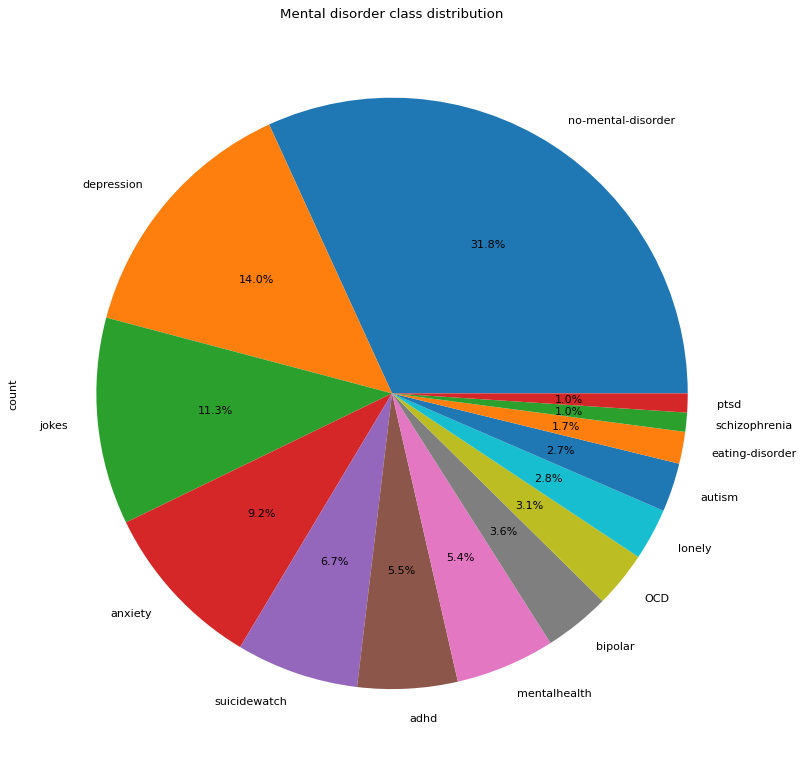

In [26]:
# distribution of labels (reddit conversations)
from matplotlib.pyplot import figure

def plot_class_dist(df: pd.DataFrame, col: str, title: str = 'distribution'):
    figure(figsize=(12, 12), dpi=80)

    counts = df[col].value_counts()
    # Create a pie chart
    counts.plot.pie(autopct="%1.1f%%")  # Add percentages to slices
    plt.title(title)
    plt.show()
    
plot_class_dist(final_df, col='subreddit', title = "Mental disorder class distribution")

In [27]:
# getting the average length of the reddit post
final_df['sentence_len'] = final_df['post'].str.split().apply(len)
final_df

,subreddit,post,sentence_len
0,no-mental-disorder,Parents who don’t fully cover their kids in th...,75
1,no-mental-disorder,Help advice needed asap 4yo stomach ache/const...,162
2,no-mental-disorder,It will be 13 degrees (F) out in the morning. ...,88
3,no-mental-disorder,Just a rant about kids and social media... The...,137
4,no-mental-disorder,Potty Training a Tyrannical Camel My daughter ...,396
...,...,...,...
23285,autism,I never disclose it. There’s too much stigma w...,228
23286,autism,I've read that its a big deal among aspies but...,88
23287,autism,All the time as a kid I was told by the adults...,130
23292,autism,I’m aware of trainspotting and its association...,465


In [28]:
final_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 835205 entries, 0 to 23293
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   subreddit     835205 non-null  object
 1   post          835205 non-null  object
 2   sentence_len  835205 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 25.5+ MB


In [29]:
def plot_hist(df: pd.DataFrame, col: str):
    plt.figure(figsize=(8, 6))  # Adjust figure size for better visualization
    df[col].hist(bins=100)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Values (Binned)')
    plt.grid(axis='y')  # Add gridlines for better readability
    plt.show()

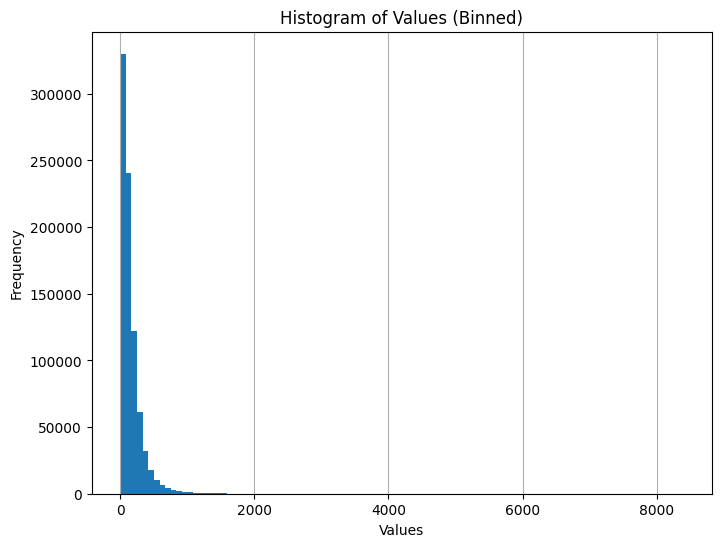

In [30]:
## plotting the distribution of the sentence length

plot_hist(final_df, 'sentence_len')

In [31]:
# basic stats
final_df.describe()

,sentence_len
count,835205.000000
mean,156.475493
std,167.462950
min,1.000000
25%,55.000000
50%,111.000000
75%,201.000000
max,8403.000000


In [32]:
# cutting off  outliers
q1 = final_df['sentence_len'].quantile(0.08)
q3 = final_df['sentence_len'].quantile(0.75)

cleaned_df = final_df.query('sentence_len >= @q1 and sentence_len <= @q3 ')
cleaned_df.describe()

,sentence_len
count,561443.000000
mean,96.048612
std,49.666169
min,20.000000
25%,54.000000
50%,90.000000
75%,134.000000
max,201.000000


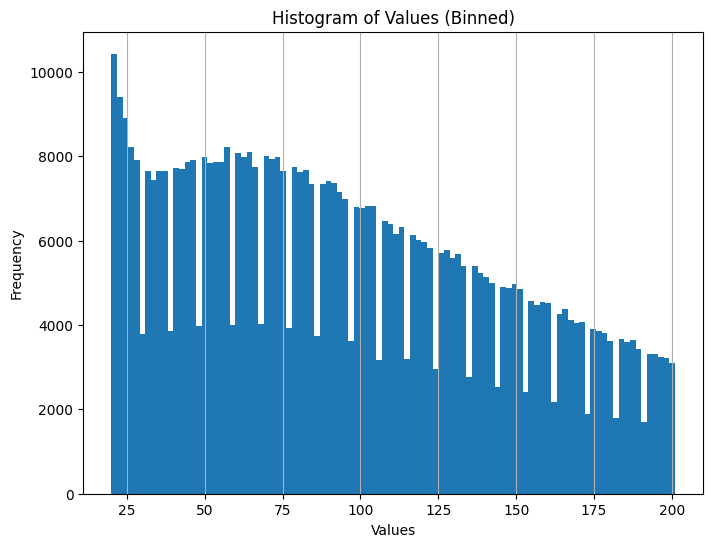

In [33]:
plot_hist(cleaned_df, 'sentence_len')

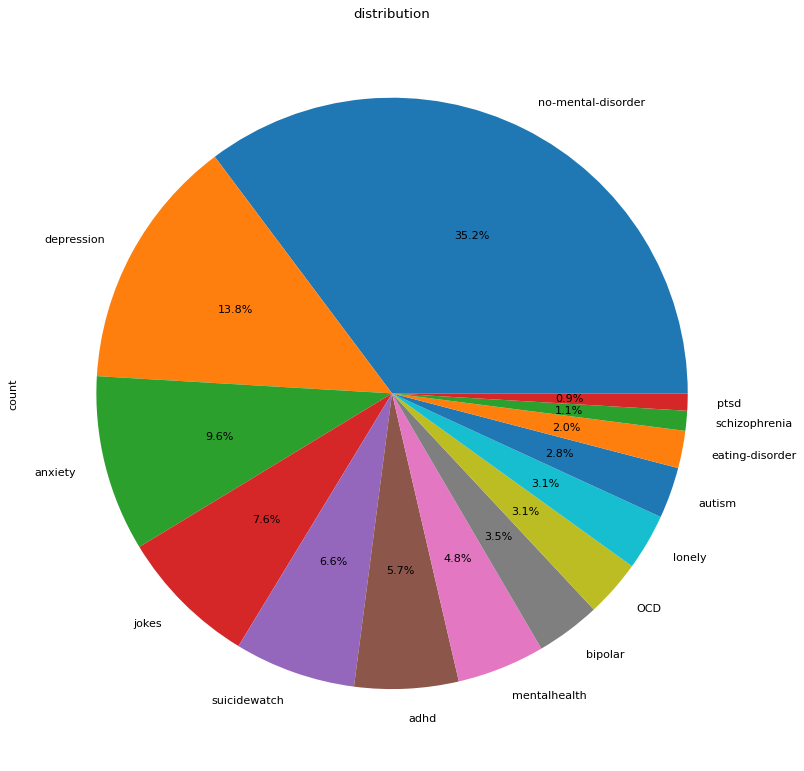

In [34]:
plot_class_dist(cleaned_df, 'subreddit')

In [35]:
# final persistence of data after cropping out the quartiles
cleaned_df.to_csv('/kaggle/working/processed_mental_disorders.csv')

# data analysis for the mental disorder classification

In [36]:
# getting the average length of the tweet
sent_df_train['sentence_len'] = sent_df_train['text'].str.split().str.len()
sent_df_test['sentence_len'] = sent_df_test['text'].str.split().str.len()
sent_df_train

,text,sentiment,sentence_len
0,"I`d have responded, if I were going",neutral,7.0
1,Sooo SAD I will miss you here in San Diego!!!,negative,10.0
2,my boss is bullying me...,negative,5.0
3,what interview! leave me alone,negative,5.0
4,"Sons of ****, why couldn`t they put them on t...",negative,14.0
...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,16.0
27477,I`ve wondered about rake to. The client has ...,negative,23.0
27478,Yay good for both of you. Enjoy the break - y...,positive,22.0
27479,But it was worth it ****.,positive,6.0


In [37]:
display(sent_df_train.info())
print('-' * 20)
display(sent_df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          27480 non-null  object 
 1   sentiment     27481 non-null  object 
 2   sentence_len  27480 non-null  float64
dtypes: float64(1), object(2)
memory usage: 644.2+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          3534 non-null   object
 1   sentiment     3534 non-null   object
 2   sentence_len  3534 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 83.0+ KB


None

In [38]:
sent_df_train = sent_df_train.dropna()
sent_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          27480 non-null  object 
 1   sentiment     27480 non-null  object 
 2   sentence_len  27480 non-null  float64
dtypes: float64(1), object(2)
memory usage: 858.8+ KB


In [39]:
sent_df_train.describe()

,sentence_len
count,27480.000000
mean,12.902875
std,6.925938
min,1.000000
25%,7.000000
50%,12.000000
75%,18.000000
max,33.000000


In [40]:
sent_df_test.describe()

,sentence_len
count,3534.000000
mean,12.763158
std,6.907024
min,1.000000
25%,7.000000
50%,12.000000
75%,18.000000
max,32.000000


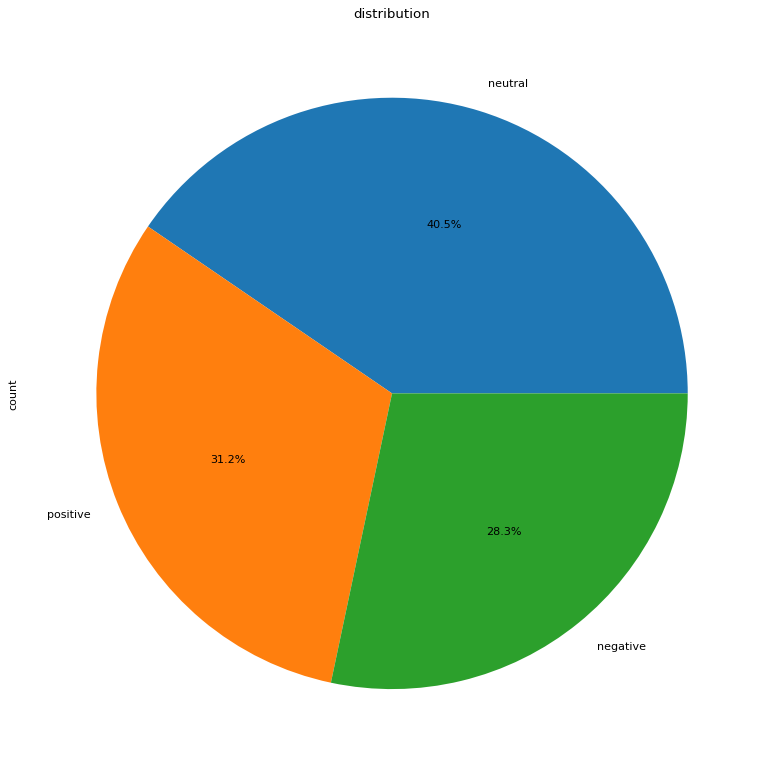

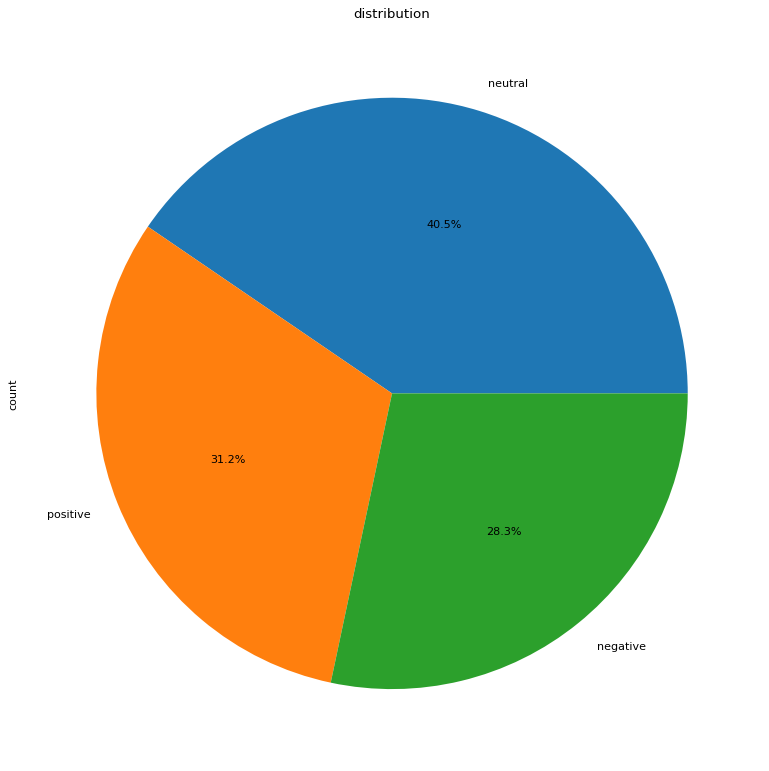

In [41]:
plot_class_dist(sent_df_train, 'sentiment')
plot_class_dist(sent_df_test, 'sentiment')

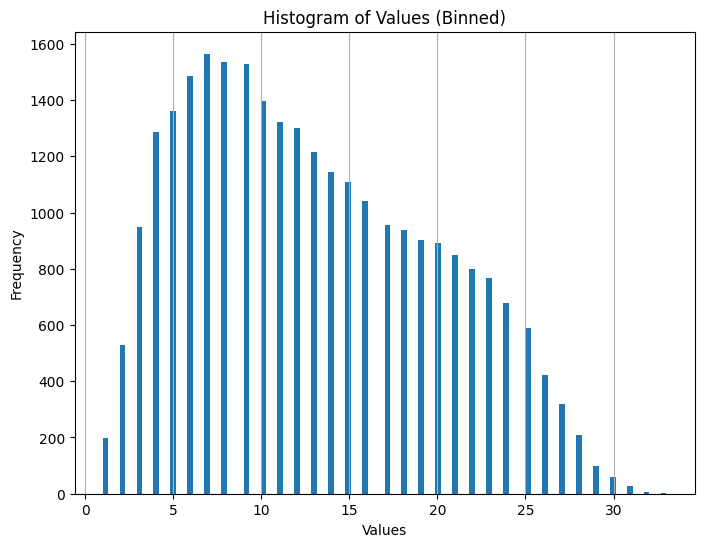

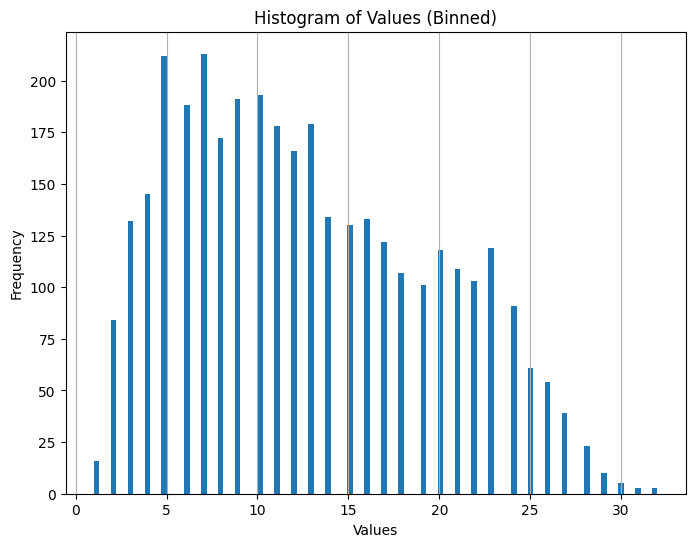

In [42]:
plot_hist(sent_df_train, 'sentence_len')
plot_hist(sent_df_test, 'sentence_len')

In [43]:
full_sent_processed = pd.concat([sent_df_train, sent_df_test])
full_sent_processed.to_csv('/kaggle/working/sentiment-dataset.csv')

# Mental disorder classifier model

In [44]:
# imports for model rtraining
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow_text as tftext
from tensorflow.data.experimental import CsvDataset
from tensorflow.data import TextLineDataset, Dataset
import functools

2024-04-06 22:58:18.874538: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-06 22:58:18.874728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-06 22:58:19.097857: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
# configurations for training the model
SENT_LABELS = ['sent_compound']
MENTAL_DISORDER_CAT_LABEL = 'subreddit'

In [46]:
# loading needed data
# mental_disorders_df = pd.read_csv('/kaggle/input/mental-disorder-dataset-analysis/final_cut.csv')
mental_disorders_df = cleaned_df

## preprocessing categorical labels

In [47]:
mental_disorder_vocab = mental_disorders_df[MENTAL_DISORDER_CAT_LABEL].unique()
mental_disorder_vocab

array(['no-mental-disorder', 'adhd', 'bipolar', 'autism', 'schizophrenia',
       'anxiety', 'lonely', 'depression', 'mentalhealth',
       'eating-disorder', 'jokes', 'ptsd', 'suicidewatch', 'OCD'],
      dtype=object)

In [48]:
# creating the lookup object
label_lookup = keras.layers.StringLookup(vocabulary=mental_disorder_vocab, output_mode='int')

In [49]:
# testing the lookup string
samples = cleaned_df[MENTAL_DISORDER_CAT_LABEL].sample(n=10)
list(samples), label_lookup(samples)

(['depression',
  'no-mental-disorder',
  'no-mental-disorder',
  'depression',
  'no-mental-disorder',
  'schizophrenia',
  'depression',
  'jokes',
  'anxiety',
  'OCD'],
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 8,  1,  1,  8,  1,  5,  8, 11,  6, 14])>)

## Preprocessing post text

In [50]:
# # BERT pre-processing for the text input
# text_ds = TextLineDataset.from_tensor_slices(text_df)
# ind = 0

# for post in text_ds.take(5):

#     print(post)
#     print('-' * 20)

# toying with tokenizers

In [51]:
examples = {
    "text_a": [
      "Sponge bob Squarepants is an Avenger",
      "Marvel Avengers"
    ],
    "text_b": [
     "Barack Obama is the President.",
     "President is the highest office"
  ],
}

dataset = tf.data.Dataset.from_tensor_slices(examples)
next(iter(dataset))

{'text_a': <tf.Tensor: shape=(), dtype=string, numpy=b'Sponge bob Squarepants is an Avenger'>,
 'text_b': <tf.Tensor: shape=(), dtype=string, numpy=b'Barack Obama is the President.'>}

## Training the mental disorder classifier model

In [52]:
_VOCAB = [
    # Special tokens
    b"[UNK]", b"[MASK]", b"[RANDOM]", b"[CLS]", b"[SEP]",
    # Suffixes
    b"##ack", b"##ama", b"##ger", b"##gers", b"##onge", b"##pants",  b"##uare",
    b"##vel", b"##ven", b"an", b"A", b"Bar", b"Hates", b"Mar", b"Ob",
    b"Patrick", b"President", b"Sp", b"Sq", b"bob", b"box", b"has", b"highest",
    b"is", b"office", b"the",
]

_START_TOKEN = _VOCAB.index(b"[CLS]")
_END_TOKEN = _VOCAB.index(b"[SEP]")
_MASK_TOKEN = _VOCAB.index(b"[MASK]")
_RANDOM_TOKEN = _VOCAB.index(b"[RANDOM]")
_UNK_TOKEN = _VOCAB.index(b"[UNK]")
_MAX_SEQ_LEN = 8
_MAX_PREDICTIONS_PER_BATCH = 5

_VOCAB_SIZE = len(_VOCAB)

In [53]:
lookup_table = tf.lookup.StaticVocabularyTable(
tf.lookup.KeyValueTensorInitializer(
keys=_VOCAB,
values = tf.range(
tf.size(_VOCAB, out_type=tf.int64), dtype=tf.int64),
    value_dtype = tf.int64
),
num_oov_buckets=1
)

In [54]:
bert_tokenizer = tftext.BertTokenizer(lookup_table, token_out_type=tf.string)
bert_tokenizer.tokenize(examples['text_a'])

<tf.RaggedTensor [[[b'Sp', b'##onge'], [b'bob'], [b'Sq', b'##uare', b'##pants'], [b'is'],
  [b'an'], [b'A', b'##ven', b'##ger']]                                  ,
 [[b'Mar', b'##vel'], [b'A', b'##ven', b'##gers']]]>

In [55]:
bert_tokenizer = tftext.BertTokenizer(lookup_table, token_out_type=tf.int64)
segment_b = bert_tokenizer.tokenize(examples['text_b']).merge_dims(-2,-1)

# Sentiment analysis model

In [56]:
# loading the sentiment analysis data
# setn_df = pd.read_csv('/kaggle/input/mental-disorder-dataset-analysis/sentiment-dataset.csv')